# 1. DATA PROCESSING

In [141]:
# Import libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
# Import data
from google.colab import files
uploaded = files.upload()

Saving cinema_dataset - cinema_dataset.csv to cinema_dataset - cinema_dataset.csv


In [3]:
# Naming the data set
df = pd.read_csv(io.BytesIO(uploaded['cinema_dataset - cinema_dataset.csv']), sep = ";", decimal=",")
df.head()

film_code                                    film_name  cinema_code  \
0       1492  Handsome: A Netflix Mystery Movie (Comedy )        304.0   
1       1492  Handsome: A Netflix Mystery Movie (Comedy )        352.0   
2       1492  Handsome: A Netflix Mystery Movie (Comedy )        489.0   
3       1492  Handsome: A Netflix Mystery Movie (Comedy )        429.0   
4       1492  Handsome: A Netflix Mystery Movie (Comedy )        524.0   

   total_sales  tickets_sold  tickets_out  show_time  occu_perc  ticket_price  \
0    3900000.0          26.0          0.0        4.0       4.26      150000.0   
1    3360000.0          42.0          0.0        5.0       8.08       80000.0   
2    2560000.0          32.0          0.0        4.0      20.00       80000.0   
3    1200000.0          12.0          0.0        1.0      11.01      100000.0   
4    1200000.0          15.0          0.0        3.0      16.67       80000.0   

   ticket_use    capacity        date,,,,  
0        26.0  610.328639    May 05,2018,  
1        42.0  519.801980    May 05,2018,  
2        32.0  160.000000  May 05,2018,,,  
3        12.0  108.991826    May 05,2018,  
4        15.0   89.982004    May 05,2018,

In [5]:
# Renaming 'date' column
df1 = df.copy()
df1 = df1.rename(columns={'date,,,,':'date'})
df1

film_code                                    film_name  cinema_code  \
0           1492  Handsome: A Netflix Mystery Movie (Comedy )        304.0   
1           1492  Handsome: A Netflix Mystery Movie (Comedy )        352.0   
2           1492  Handsome: A Netflix Mystery Movie (Comedy )        489.0   
3           1492  Handsome: A Netflix Mystery Movie (Comedy )        429.0   
4           1492  Handsome: A Netflix Mystery Movie (Comedy )        524.0   
...          ...                                          ...          ...   
99994       1485                       #REALITYHIGH (Comedy )        533.0   
99995       1485                       #REALITYHIGH (Comedy )        196.0   
99996       1485                       #REALITYHIGH (Comedy )        488.0   
99997       1485                       #REALITYHIGH (Comedy )        222.0   
99998       1485                       #REALITYHIGH (Comedy )        142.0   

       total_sales  tickets_sold  tickets_out  show_time  occu_perc  \
0        3900000.0          26.0          0.0        4.0       4.26   
1        3360000.0          42.0          0.0        5.0       8.08   
2        2560000.0          32.0          0.0        4.0      20.00   
3        1200000.0          12.0          0.0        1.0      11.01   
4        1200000.0          15.0          0.0        3.0      16.67   
...            ...           ...          ...        ...        ...   
99994    2550000.0          73.0          0.0        2.0      33.18   
99995    2400000.0          30.0          0.0        3.0      16.67   
99996    2360000.0          59.0          0.0        1.0      22.18   
99997    2320000.0          29.0          0.0        3.0      11.51   
99998    2300000.0          24.0          0.0        3.0      22.86   

       ticket_price  ticket_use    capacity            date  
0      150000.00000        26.0  610.328639    May 05,2018,  
1       80000.00000        42.0  519.801980    May 05,2018,  
2       80000.00000        32.0  160.000000  May 05,2018,,,  
3      100000.00000        12.0  108.991826    May 05,2018,  
4       80000.00000        15.0   89.982004    May 05,2018,  
...             ...         ...         ...             ...  
99994   34931.50685        73.0  220.012056     May 12,2018  
99995   80000.00000        30.0  179.964007    May 12,2018,  
99996   40000.00000        59.0  266.005410    May 12,2018,  
99997   80000.00000        29.0  251.954822    May 12,2018,  
99998   95833.33333        24.0  104.986877     May 12,2018  

[99999 rows x 12 columns]

In [6]:
# Check for missing values
df1.isna().sum()

film_code        0
film_name        2
cinema_code     10
total_sales      9
tickets_sold     5
tickets_out      8
show_time        4
occu_perc       79
ticket_price    12
ticket_use       4
capacity        73
date             0
dtype: int64

In [97]:
# Checking the ratio of null values present in every variable
pd.DataFrame(data = [df1.isna().sum()/df1.shape[0]*100],
             index=["Null (%)"]).T.style.background_gradient(cmap='winter')

We can see that there is a low percentage of null values, therefore, we can drop them

In [8]:
# Dropping missing values
df2 = df1.dropna()

In [9]:
# Testing if the dropping was done correctly
df2.isna().sum()

film_code       0
film_name       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
dtype: int64

In [10]:
# Checking for duplicate data
print(f"Dataset has {df2.duplicated().sum()} duplicated data")

Dataset has 104 duplicated data


In [11]:
df2.drop_duplicates(keep='first')

film_code                                    film_name  cinema_code  \
0           1492  Handsome: A Netflix Mystery Movie (Comedy )        304.0   
1           1492  Handsome: A Netflix Mystery Movie (Comedy )        352.0   
2           1492  Handsome: A Netflix Mystery Movie (Comedy )        489.0   
3           1492  Handsome: A Netflix Mystery Movie (Comedy )        429.0   
4           1492  Handsome: A Netflix Mystery Movie (Comedy )        524.0   
...          ...                                          ...          ...   
99994       1485                       #REALITYHIGH (Comedy )        533.0   
99995       1485                       #REALITYHIGH (Comedy )        196.0   
99996       1485                       #REALITYHIGH (Comedy )        488.0   
99997       1485                       #REALITYHIGH (Comedy )        222.0   
99998       1485                       #REALITYHIGH (Comedy )        142.0   

       total_sales  tickets_sold  tickets_out  show_time  occu_perc  \
0        3900000.0          26.0          0.0        4.0       4.26   
1        3360000.0          42.0          0.0        5.0       8.08   
2        2560000.0          32.0          0.0        4.0      20.00   
3        1200000.0          12.0          0.0        1.0      11.01   
4        1200000.0          15.0          0.0        3.0      16.67   
...            ...           ...          ...        ...        ...   
99994    2550000.0          73.0          0.0        2.0      33.18   
99995    2400000.0          30.0          0.0        3.0      16.67   
99996    2360000.0          59.0          0.0        1.0      22.18   
99997    2320000.0          29.0          0.0        3.0      11.51   
99998    2300000.0          24.0          0.0        3.0      22.86   

       ticket_price  ticket_use    capacity            date  
0      150000.00000        26.0  610.328639    May 05,2018,  
1       80000.00000        42.0  519.801980    May 05,2018,  
2       80000.00000        32.0  160.000000  May 05,2018,,,  
3      100000.00000        12.0  108.991826    May 05,2018,  
4       80000.00000        15.0   89.982004    May 05,2018,  
...             ...         ...         ...             ...  
99994   34931.50685        73.0  220.012056     May 12,2018  
99995   80000.00000        30.0  179.964007    May 12,2018,  
99996   40000.00000        59.0  266.005410    May 12,2018,  
99997   80000.00000        29.0  251.954822    May 12,2018,  
99998   95833.33333        24.0  104.986877     May 12,2018  

[99760 rows x 12 columns]

We don't have a lot of duplicated data so we drop them. 

In [41]:
# Separate date from month and year for forecasting
df2['Day'] = df2['date'].apply(lambda x: x.split(" ")[1])
df2['Day'] = df2['Day'].apply(lambda x: x.split(",")[0])
df2['Year'] = df2['date'].apply(lambda x: x.split(",")[1])
df2['Month'] = df2['date'].apply(lambda x: x.split(" ")[0])
df2.head()

film_code                                    film_name  cinema_code  \
0       1492  Handsome: A Netflix Mystery Movie (Comedy )        304.0   
1       1492  Handsome: A Netflix Mystery Movie (Comedy )        352.0   
2       1492  Handsome: A Netflix Mystery Movie (Comedy )        489.0   
3       1492  Handsome: A Netflix Mystery Movie (Comedy )        429.0   
4       1492  Handsome: A Netflix Mystery Movie (Comedy )        524.0   

   total_sales  tickets_sold  tickets_out  show_time  occu_perc  ticket_price  \
0    3900000.0          26.0          0.0        4.0       4.26      150000.0   
1    3360000.0          42.0          0.0        5.0       8.08       80000.0   
2    2560000.0          32.0          0.0        4.0      20.00       80000.0   
3    1200000.0          12.0          0.0        1.0      11.01      100000.0   
4    1200000.0          15.0          0.0        3.0      16.67       80000.0   

   ticket_use    capacity            date Day  Year Month  
0        26.0  610.328639    May 05,2018,  05  2018   May  
1        42.0  519.801980    May 05,2018,  05  2018   May  
2        32.0  160.000000  May 05,2018,,,  05  2018   May  
3        12.0  108.991826    May 05,2018,  05  2018   May  
4        15.0   89.982004    May 05,2018,  05  2018   May

In [42]:
# Checking the observations for the 'year' new variable
df2.groupby('Year').count()

film_code  film_name  cinema_code  total_sales  tickets_sold  \
Year                                                                 
1900          1          1            1            1             1   
2018      99863      99863        99863        99863         99863   

      tickets_out  show_time  occu_perc  ticket_price  ticket_use  capacity  \
Year                                                                          
1900            1          1          1             1           1         1   
2018        99863      99863      99863         99863       99863     99863   

       date    Day  Month  
Year                       
1900      1      1      1  
2018  99863  99863  99863

In [43]:
# Eliminating the observation with year 1900 since it is not representative 
df3= df2.drop(df2[df2['Year']=='1900'].index)
years_ = df3['Year'].unique()
print('Set of years:',years_)

Set of years: ['2018']


Checking for outliers of the relevant numerical variables

In [140]:
#1. 'total_sales'
total_sales = df3['total_sales']
Q1ts = np.percentile(total_sales, 25,
                   interpolation = 'midpoint')
 
Q3ts = np.percentile(total_sales, 75,
                   interpolation = 'midpoint')
IQRts = Q3ts - Q1ts
print(IQRts)
print(Q1ts)
print(Q3ts)

lower_ts, upper_ts = Q1ts - IQRts*1.5, Q3ts + IQRts*1.5
outliers_ts = [x for x in total_sales if (x >= upper_ts) | (x <= lower_ts)]
print(lower_ts)
print(upper_ts)
print(len(outliers_ts))

9400000.0
1200000.0
10600000.0
-12900000.0
24700000.0
11573


Given that the  number of outliers for 'total_sales' is 11573, I won't be deleting them since as they consist of more than the
10% of the observations they represent a relevant significance for the distribution of this variable and the segment of the market
they represent

In [139]:
# 2. 'ticket_price'
ticket_price = df3['ticket_price']
Q1tp = np.percentile(ticket_price, 25,
                   interpolation = 'midpoint')
 
Q3tp = np.percentile(ticket_price, 75,
                   interpolation = 'midpoint')
IQRtp = Q3tp - Q1tp
print(IQRtp)
print(Q1tp)
print(Q3tp)

lower_tp, upper_tp = Q1tp - IQRtp*1.5, Q3tp + IQRtp*1.5
outliers_tp = [x for x in ticket_price if (x >= upper_tp) | (x <= lower_tp)]
print(lower_tp)
print(upper_tp)
print(len(outliers_tp))
print(outliers_tp)

# Eliminating the 10 outliers for 'ticket_price'
df4 = df3.copy()
df4 = df4[~((ticket_price < lower_tp) |(ticket_price > upper_tp))]

40000.0
60000.0
100000.0
0.0
160000.0
10
[470000.0, 470000.0, 500000.0, 500000.0, 181224.4898, 280000.0, 500000.0, 500000.0, 161052.6316, 700000.0]


There are 10 outliers for ticket_price. We eliminate them since it's strange that 10 tickets have values that differ
signifficantly from the range of the rest of the data set

In [138]:
# 3. 'tickets_sold'
tickets_sold = df4['tickets_sold']
Q1sold = np.percentile(tickets_sold, 25, interpolation = 'midpoint')
Q3sold = np.percentile(tickets_sold, 75, interpolation = 'midpoint')
IQRsold = Q3sold - Q1sold
print(IQRsold)
print(Q1sold)
print(Q3sold)

lower_sold, upper_sold= Q1sold - IQRsold*1.5, Q3sold + IQRsold*1.5
outliers_sold = [x for x in tickets_sold if (x >= upper_sold) | (x <= lower_sold)]
print(lower_sold)
print(upper_sold)
print(len(outliers_sold))

115.0
17.0
132.0
-155.5
304.5
10964


Given that the number of outliers for 'tickets_sold' is 10964, I won't be deleting them since as they consist of more than the 10% of the observations they represent a relevant significance for the distribution of this variable and the segment of the market they represent

In [51]:
#4. 'show_time'
show_time = df4['show_time']
show_time.value_counts()

3.0     21085
2.0     19683
1.0     16104
4.0     13424
6.0     10395
5.0      5491
7.0      4000
8.0      3478
12.0     1600
10.0     1393
14.0      928
9.0       823
16.0      303
11.0      298
13.0      214
15.0      109
17.0       73
18.0       73
20.0       44
24.0       36
22.0       33
19.0       33
26.0       25
21.0       25
28.0       19
25.0       17
30.0       17
36.0       15
27.0       14
23.0       13
33.0       10
31.0        9
32.0        9
29.0        8
44.0        8
34.0        7
40.0        7
35.0        6
38.0        5
42.0        3
37.0        3
46.0        2
39.0        2
48.0        2
43.0        1
50.0        1
47.0        1
60.0        1
52.0        1
45.0        1
41.0        1
Name: show_time, dtype: int64

In [137]:
Q1st = np.percentile(show_time, 25, interpolation = 'midpoint')
Q3st = np.percentile(show_time, 75, interpolation = 'midpoint')
IQRst = Q3st - Q1st
print(IQRst)
print(Q1st)
print(Q3st)

lower_st, upper_st= Q1st - IQRst*1.5, Q3st + IQRst*1.5
outliers_st = [x for x in show_time if (x >= upper_st) | (x <= lower_st)]
print(lower_st)
print(upper_st)
print(len(outliers_st))

3.0
2.0
5.0
-2.5
9.5
5370


Given that the number of outliers for 'show_time' is 5370, I won't be deleting them since as they consist of more than the 5% of the observations they represent a relevant significance for the distribution of this variable and the segment of the market they represent

In [136]:
# 5. 'capacity'
capacity = df4['capacity']
Q1c = np.percentile(capacity, 25, interpolation = 'midpoint')
Q3c = np.percentile(capacity, 75, interpolation = 'midpoint')
IQRc = Q3c- Q1c
print(IQRc)
print(Q1c)
print(Q3c)

lower_c, upper_c= Q1c - IQRc*1.5, Q3c + IQRc*1.5
outliers_c = [x for x in show_time if (x >= upper_c) | (x <= lower_c)]
print(lower_c)
print(upper_c)
print(len(outliers_c))

771.7880872
266.0270388
1037.815126
-891.6550919999999
2195.4972568
0


No outliers for this variable. 

In [135]:
# 6. 'occu_perc'
occu_perc = df4['occu_perc']
Q1o = np.percentile(occu_perc, 25, interpolation = 'midpoint')
Q3o = np.percentile(occu_perc, 75, interpolation = 'midpoint')
IQRo = Q3o- Q1o
print(IQRo)
print(Q1o)
print(Q3o)

lower_o, upper_o= Q1o - IQRo*1.5, Q3o + IQRo*1.5
outliers_o = [x for x in show_time if (x >= upper_o) | (x <= lower_o)]
print(lower_o)
print(upper_o)
print(len(outliers_o))

22.97
3.51
26.48
-30.945
60.935
0


No outliers for this variable

In [134]:
# 7. 'ticket_use'
ticket_use = df4['ticket_use']
Q1tu = np.percentile(ticket_use, 25, interpolation = 'midpoint')
Q3tu = np.percentile(ticket_use, 75, interpolation = 'midpoint')
IQRtu = Q3tu- Q1tu
print(IQRtu)
print(Q1tu)
print(Q3tu)

lower_tu, upper_tu= Q1tu - IQRtu*1.5, Q3tu + IQRtu*1.5
outliers_tu = [x for x in show_time if (x >= upper_tu) | (x <= lower_tu)]
print(lower_tu)
print(upper_tu)
print(len(outliers_tu))

114.0
17.0
131.0
-154.0
302.0
0


No outliers for this variable

In [133]:
# Brief description of the final data set processed
df4.describe()

film_code   cinema_code   total_sales  tickets_sold   tickets_out  \
count  99853.000000  99853.000000  9.985300e+04  99853.000000  99853.000000   
mean    1525.604939    324.361271  1.244420e+07    137.229387      0.216358   
std       35.663522    160.945567  3.297242e+07    296.131881      2.680540   
min     1471.000000     32.000000  2.400000e+04      1.000000      0.000000   
25%     1494.000000    181.000000  1.200000e+06     17.000000      0.000000   
50%     1511.000000    338.000000  3.450000e+06     45.000000      0.000000   
75%     1558.000000    474.000000  1.061000e+07    132.000000      0.000000   
max     1589.000000    565.000000  1.262820e+09   8499.000000    265.000000   

          show_time     occu_perc   ticket_price    ticket_use      capacity  
count  99853.000000  99853.000000   99853.000000  99853.000000  99853.000000  
mean       3.974773     19.032306   83225.973986    137.013029    859.916603  
std        3.138246     22.082742   33364.544097    295.923066    987.396042  
min        1.000000      0.000000    2285.714286   -219.000000     -2.000000  
25%        2.000000      3.510000   60000.000000     17.000000    266.027039  
50%        3.000000      9.580000   80000.000000     45.000000    515.959773  
75%        5.000000     26.480000  100000.000000    131.000000   1037.815126  
max       60.000000    136.500000  156358.381500   8499.000000   9692.097160

# 2. SEGMENTATION FOR MOVIES

In [57]:
# Making a new column for film genre 
df5 = df4.copy()
df5['film_genre'] = df5['film_name'].apply(lambda x: x.split("(")[1])
df5['film_genre'] = df5['film_genre'].apply(lambda x: x.split(")")[0])
df5['film_name'] = df5['film_name'].apply(lambda x: x.split("(")[0])

df5.head()

film_code                           film_name  cinema_code  total_sales  \
0       1492  Handsome: A Netflix Mystery Movie         304.0    3900000.0   
1       1492  Handsome: A Netflix Mystery Movie         352.0    3360000.0   
2       1492  Handsome: A Netflix Mystery Movie         489.0    2560000.0   
3       1492  Handsome: A Netflix Mystery Movie         429.0    1200000.0   
4       1492  Handsome: A Netflix Mystery Movie         524.0    1200000.0   

   tickets_sold  tickets_out  show_time  occu_perc  ticket_price  ticket_use  \
0          26.0          0.0        4.0       4.26      150000.0        26.0   
1          42.0          0.0        5.0       8.08       80000.0        42.0   
2          32.0          0.0        4.0      20.00       80000.0        32.0   
3          12.0          0.0        1.0      11.01      100000.0        12.0   
4          15.0          0.0        3.0      16.67       80000.0        15.0   

     capacity            date Day  Year Month film_genre  
0  610.328639    May 05,2018,  05  2018   May    Comedy   
1  519.801980    May 05,2018,  05  2018   May    Comedy   
2  160.000000  May 05,2018,,,  05  2018   May    Comedy   
3  108.991826    May 05,2018,  05  2018   May    Comedy   
4   89.982004    May 05,2018,  05  2018   May    Comedy

In [164]:
# Total value of reproduced films watched in different cinemas grouped by genres
films_genre = df5['film_genre'].value_counts()
films_genre

Comedy                       23264
Drama                        14120
Documentary                  10347
Thriller                      8615
Dark comedy                   6109
Comedy horror                 5185
Romance                       4431
Horror thriller               4046
Romantic drama                3911
Biopic                        3548
One-man show                  3250
War-Comedy                    2268
Horror/Crime drama            2144
Black comedy                  1443
Heist                         1385
Urban fantasy                 1300
War                           1044
Science fiction/Thriller       678
Romantic comedy                601
Teen comedy horror             558
Action thriller                551
Western                        418
Crime thriller                 313
Science fiction/Drama          285
Anime/Science fiction           39
Name: film_genre, dtype: int64

In [162]:
# Grouping film genres by total sales revenue for segmenting by film genres
sales_genre= df5.groupby(['film_genre'])['total_sales'].sum().reset_index()
sales_genre

film_genre   total_sales
0            Action thriller   2.011120e+09
1      Anime/Science fiction   1.649000e+07
2                     Biopic   2.505184e+10
3               Black comedy   1.185979e+10
4                     Comedy   2.837323e+11
5              Comedy horror   3.186311e+10
6             Crime thriller   5.475100e+08
7                Dark comedy   2.488601e+10
8                Documentary   1.104182e+11
9                      Drama   3.836248e+11
10                     Heist   5.267678e+09
11           Horror thriller   2.939117e+10
12        Horror/Crime drama   1.045775e+10
13              One-man show   2.161673e+10
14                   Romance   9.505492e+10
15           Romantic comedy   7.231250e+08
16            Romantic drama   3.058253e+10
17     Science fiction/Drama   4.409250e+08
18  Science fiction/Thriller   1.493515e+09
19        Teen comedy horror   1.601015e+09
20                  Thriller   1.493697e+11
21             Urban fantasy   3.443655e+09
22                       War   2.604852e+09
23                War-Comedy   1.541557e+10
24                   Western   1.116785e+09

In [174]:
# Checking which are the most popular film genres by the revenue generated
sales_genre= df5.groupby(['film_genre'])['total_sales'].sum().reset_index()
sales_genre.sort_values(by=['total_sales'], ascending = False)[:5]

film_genre   total_sales
9         Drama   3.836248e+11
4        Comedy   2.837323e+11
20     Thriller   1.493697e+11
8   Documentary   1.104182e+11
14      Romance   9.505492e+10

In [169]:
# Plotting the distribution for total_sales in different film_gender categories
import plotly.graph_objects as go
fig_sales_gender = px.pie(df5, values='total_sales', names='film_genre', title='Distribution of total_sales by film_genre')
fig_sales_gender.update_layout(
    legend_title = 'Film Genders',
    title_font = dict(family='timesnewroman', size=25, color='black'),
    title_x=0.5,
    font_family="timesnewroman",
    font_color="black",
    legend_title_font_color="black",
    legend_font = dict(family='timesnewroman', size=15, color='black'),
   )
fig_sales_gender.show()

Now I am going to calculate for every film gender the mean of their total_sales, so that we are going to be able to detect if a specific genre is popular because of a higher number of movies that are produced and reproduced or if it is because their individual films have collected higher levels of ticket sales 

In [170]:
# Grouping film genres by average sales revenue for segmenting by film genres
msales_genre= df5.groupby(['film_genre'])['total_sales'].mean().reset_index()
msales_genre

film_genre   total_sales
0            Action thriller   3.649946e+06
1      Anime/Science fiction   4.228205e+05
2                     Biopic   7.060834e+06
3               Black comedy   8.218841e+06
4                     Comedy   1.219620e+07
5              Comedy horror   6.145248e+06
6             Crime thriller   1.749233e+06
7                Dark comedy   4.073664e+06
8                Documentary   1.067152e+07
9                      Drama   2.716889e+07
10                     Heist   3.803378e+06
11           Horror thriller   7.264254e+06
12        Horror/Crime drama   4.877682e+06
13              One-man show   6.651301e+06
14                   Romance   2.145225e+07
15           Romantic comedy   1.203203e+06
16            Romantic drama   7.819619e+06
17     Science fiction/Drama   1.547105e+06
18  Science fiction/Thriller   2.202824e+06
19        Teen comedy horror   2.869203e+06
20                  Thriller   1.733833e+07
21             Urban fantasy   2.648965e+06
22                       War   2.495069e+06
23                War-Comedy   6.796989e+06
24                   Western   2.671734e+06

In [175]:
# Checking which are the most popular film genres by the average revenue generated (so that their individual films have been the most populars)
msales_genre= df5.groupby(['film_genre'])['total_sales'].mean().reset_index()
msales_genre.sort_values(by=['total_sales'], ascending = False)[:5]

film_genre   total_sales
9         Drama   2.716889e+07
14      Romance   2.145225e+07
20     Thriller   1.733833e+07
4        Comedy   1.219620e+07
8   Documentary   1.067152e+07

From this we can extract the following conclusion: Definetly, Drama is the most popular genre, both in terms of average revenue of the films in this category and total revenue gained between the 14120 reproductions of films over different cinemas. However, we can also notice that the Comedy genre has a higher result for total_sales than for average sales, which means that it has a higher number of films that constitute this genre, but its individual films have not generated that much money individually as the Romance genre does. 

In [178]:
# Checking if there's a difference in between the most seen film genres and the most populars in terms of sales
film_genre_df = df5.groupby(['film_genre'])['ticket_use'].sum().reset_index()
film_genre_df.sort_values(by=['ticket_use'], ascending = False)[:7]

film_genre  ticket_use
9             Drama    4248115.0
4            Comedy    3009694.0
20         Thriller    1774292.0
8       Documentary    1170562.0
14          Romance     967095.0
5     Comedy horror     380937.0
11  Horror thriller     374058.0

We can see the difference in between the 7th top film genre, where in total sales 'Romantic Drama' made a higher revenue, but in case of usage of the actual ticket 'Horror Thriller' was more popular, which could mean a higher consumer engagement of the audience that has a taste for Horror Thriller movies. 

In [63]:
# Creating a pivot table for relating total sales and cinema code by film name
df6 = df5.pivot_table('total_sales', 'cinema_code', 'film_name', aggfunc=np.sum)
df6= df6.fillna(0)
df6

film_name    #REALITYHIGH         1922   A Christmas Prince    Blame!   \
cinema_code                                                              
32.0                   0.0          0.0                  0.0       0.0   
33.0                   0.0          0.0                  0.0       0.0   
34.0                   0.0   90060000.0                  0.0       0.0   
35.0             8300000.0          0.0                  0.0       0.0   
39.0            43050000.0  152880000.0                  0.0  180000.0   
...                    ...          ...                  ...       ...   
558.0                  0.0    2720000.0                  0.0       0.0   
560.0                  0.0          0.0                  0.0       0.0   
561.0                  0.0          0.0                  0.0       0.0   
562.0                  0.0          0.0                  0.0       0.0   
565.0                  0.0          0.0                  0.0       0.0   

film_name    Bomb Scared       Bright   Burning Sands   Casting JonBenet   \
cinema_code                                                                 
32.0                  0.0   93620000.0             0.0                0.0   
33.0          186950000.0          0.0             0.0        258660000.0   
34.0                  0.0   26520000.0             0.0        379260000.0   
35.0                  0.0          0.0             0.0        359050000.0   
39.0           70000000.0  210000000.0      92900000.0        192420000.0   
...                   ...          ...             ...                ...   
558.0                 0.0          0.0             0.0         35320000.0   
560.0                 0.0          0.0             0.0         38920000.0   
561.0                 0.0          0.0       2940000.0        120312000.0   
562.0                 0.0          0.0             0.0                0.0   
565.0                 0.0          0.0             0.0          6720000.0   

film_name    Christmas Inheritance      Clinical   ...  \
cinema_code                                        ...   
32.0                            0.0  0.000000e+00  ...   
33.0                            0.0  0.000000e+00  ...   
34.0                    338570000.0  2.014050e+09  ...   
35.0                    143300000.0  1.380050e+09  ...   
39.0                     35000000.0  1.182250e+09  ...   
...                             ...           ...  ...   
558.0                           0.0  0.000000e+00  ...   
560.0                           0.0  0.000000e+00  ...   
561.0                           0.0  0.000000e+00  ...   
562.0                           0.0  0.000000e+00  ...   
565.0                           0.0  0.000000e+00  ...   

film_name    The Incredible Jessica James   The Killer   The Mars Generation   \
cinema_code                                                                     
32.0                           116700000.0          0.0                   0.0   
33.0                                   0.0          0.0                   0.0   
34.0                           133380000.0          0.0                   0.0   
35.0                                   0.0          0.0                   0.0   
39.0                           249300000.0          0.0                   0.0   
...                                    ...          ...                   ...   
558.0                           34920000.0          0.0                   0.0   
560.0                                  0.0          0.0                   0.0   
561.0                                  0.0          0.0                   0.0   
562.0                            9060000.0          0.0                   0.0   
565.0                                  0.0          0.0                   0.0   

film_name    The Most Hated Woman in America       Tramps      Voyuer    \
cinema_code                                                               
32.0                                      0.0          0.0          0.0   
3

This pivot table will allow us to quickly acces information of the total sales generated in each cinema by every film

In [64]:
# Creating a pivot table for relating total sales and cinema code by film genre
df7= df5.pivot_table('total_sales', 'cinema_code', 'film_genre', aggfunc=np.sum)
df7= df7.fillna(0)
df7

film_genre   Action thriller   Anime/Science fiction       Biopic   \
cinema_code                                                          
32.0                      0.0                     0.0          0.0   
33.0                      0.0                     0.0  315000000.0   
34.0                      0.0                     0.0  484560000.0   
35.0                      0.0                     0.0          0.0   
39.0                      0.0                180000.0  187620000.0   
...                       ...                     ...          ...   
558.0                     0.0                     0.0          0.0   
560.0                     0.0                     0.0          0.0   
561.0                     0.0                     0.0  103350000.0   
562.0                     0.0                     0.0          0.0   
565.0                     0.0                     0.0          0.0   

film_genre   Black comedy        Comedy   Comedy horror   Crime thriller   \
cinema_code                                                                 
32.0                   0.0  4.498090e+09             0.0              0.0   
33.0           186950000.0  1.239900e+09             0.0              0.0   
34.0                   0.0  2.951170e+09     151420000.0              0.0   
35.0                   0.0  1.895550e+09     221650000.0              0.0   
39.0            70000000.0  1.419050e+09      35000000.0              0.0   
...                    ...           ...             ...              ...   
558.0                  0.0  3.492000e+07             0.0              0.0   
560.0                  0.0  0.000000e+00             0.0              0.0   
561.0                  0.0  0.000000e+00             0.0              0.0   
562.0                  0.0  9.060000e+06             0.0              0.0   
565.0                  0.0  0.000000e+00             0.0              0.0   

film_genre   Dark comedy   Documentary         Drama   ...  Romantic comedy   \
cinema_code                                            ...                     
32.0                  0.0  9.946400e+08  3.511300e+09  ...               0.0   
33.0                  0.0  4.550400e+08  1.120030e+09  ...               0.0   
34.0          672180000.0  1.370760e+09  6.372300e+09  ...               0.0   
35.0           92650000.0  8.784000e+08  2.295550e+09  ...               0.0   
39.0          166380000.0  7.429800e+08  3.041610e+09  ...               0.0   
...                   ...           ...           ...  ...               ...   
558.0                 0.0  3.532000e+07  3.024000e+07  ...               0.0   
560.0                 0.0  4.644500e+07  1.988000e+07  ...               0.0   
561.0                 0.0  3.196040e+08  2.047920e+08  ...               0.0   
562.0                 0.0  1.022400e+08  0.000000e+00  ...               0.0   
565.0                 0.0  6.720000e+06  0.000000e+00  ...               0.0   

film_genre   Romantic drama   Science fiction/Drama   \
cinema_code                                            
32.0                     0.0                     0.0   
33.0                     0.0                     0.0   
34.0             338570000.0                     0.0   
35.0             143300000.0                     0.0   
39.0              35000000.0                     0.0   
...                      ...                     ...   
558.0                    0.0                     0.0   
560.0                    0.0                     0.0   
561.0                    0.0                     0.0   
562.0                    0.0                     0.0   
565.0                    0.0                     0.0   

film_genre   Science fiction/Thriller   Teen comedy horror      Thriller   \
cinema_code                                                                 
32.0                       158300000.0                  0.0  0.000000e+00   
33.0                               0.0           30840000.0  0.000000e+00   
34.0     

Following the same intuition, this table will allow to easily acces information of the popularity in terms of sales of every film genre, divided by each cinema

In [65]:
# Figuring out the film and cinema which got the maximum value on total sales
df5.loc[df5['total_sales'].idxmax()]

film_code                              1554
film_name       Deidra & Laney Rob a Train 
cinema_code                           448.0
total_sales                    1262819994.0
tickets_sold                         8499.0
tickets_out                             0.0
show_time                              47.0
occu_perc                             87.69
ticket_price                    148584.5387
ticket_use                           8499.0
capacity                         9692.09716
date                           July 20,2018
Day                                      20
Year                                   2018
Month                                  July
film_genre                           Drama 
Name: 83899, dtype: object

The film that recollected the highest revenue is a 'Drama' labeled film, which is coherent with the results that point out that 'Drama' is the most popular film genre, which is useful to know for the upcoming market segmentation

In [66]:
# Hot encoding for genre
df10 = df5.copy()
genre_encoded = pd.get_dummies(df10['film_genre'], drop_first = True) 
df10 = df10.join(genre_encoded)
df10

film_code                           film_name  cinema_code  \
0           1492  Handsome: A Netflix Mystery Movie         304.0   
1           1492  Handsome: A Netflix Mystery Movie         352.0   
2           1492  Handsome: A Netflix Mystery Movie         489.0   
3           1492  Handsome: A Netflix Mystery Movie         429.0   
4           1492  Handsome: A Netflix Mystery Movie         524.0   
...          ...                                 ...          ...   
99994       1485                       #REALITYHIGH         533.0   
99995       1485                       #REALITYHIGH         196.0   
99996       1485                       #REALITYHIGH         488.0   
99997       1485                       #REALITYHIGH         222.0   
99998       1485                       #REALITYHIGH         142.0   

       total_sales  tickets_sold  tickets_out  show_time  occu_perc  \
0        3900000.0          26.0          0.0        4.0       4.26   
1        3360000.0          42.0          0.0        5.0       8.08   
2        2560000.0          32.0          0.0        4.0      20.00   
3        1200000.0          12.0          0.0        1.0      11.01   
4        1200000.0          15.0          0.0        3.0      16.67   
...            ...           ...          ...        ...        ...   
99994    2550000.0          73.0          0.0        2.0      33.18   
99995    2400000.0          30.0          0.0        3.0      16.67   
99996    2360000.0          59.0          0.0        1.0      22.18   
99997    2320000.0          29.0          0.0        3.0      11.51   
99998    2300000.0          24.0          0.0        3.0      22.86   

       ticket_price  ticket_use  ...  Romantic comedy  Romantic drama   \
0      150000.00000        26.0  ...                 0               0   
1       80000.00000        42.0  ...                 0               0   
2       80000.00000        32.0  ...                 0               0   
3      100000.00000        12.0  ...                 0               0   
4       80000.00000        15.0  ...                 0               0   
...             ...         ...  ...               ...             ...   
99994   34931.50685        73.0  ...                 0               0   
99995   80000.00000        30.0  ...                 0               0   
99996   40000.00000        59.0  ...                 0               0   
99997   80000.00000        29.0  ...                 0               0   
99998   95833.33333        24.0  ...                 0               0   

      Science fiction/Drama  Science fiction/Thriller  Teen comedy horror   \
0                          0                         0                   0   
1                          0                         0                   0   
2                          0                         0                   0   
3                          0                         0                   0   
4                          0                         0                   0   
...                      ...                       ...                 ...   
99994                      0                         0                   0   
99995                      0                         0                   0   
99996                      0                         0                   0   
99997                      0                         0                   0   
99998                      0                         0                   0   

      Thriller   Urban fantasy   War   War-Comedy   Western   
0             0               0     0            0         0  
1             0               0     0            0         0  
2             0               0     0            0         0  
3             0               0     0            0         0  
4             0               0     0            0         0  
...         ...             ...   ...          ...       ...  
99994         0               0     0            0        

This process of converting the categorical data variables could improve predictions for the movie market segmentation in terms of film genre, as well as classification accuracy of the model

In [67]:
# Checking if there's any relationship between film genres and the starting time of the films 
df8 = df5.copy()
m_show_time = df8.groupby(['film_genre'])['show_time'].mean()
m_show_time

film_genre
Action thriller              3.094374
Anime/Science fiction        2.333333
Biopic                       3.596110
Black comedy                 3.208593
Comedy                       3.809749
Comedy horror                3.817936
Crime thriller               2.747604
Dark comedy                  2.907186
Documentary                  3.897362
Drama                        5.256020
Heist                        3.010830
Horror thriller              3.981957
Horror/Crime drama           3.542910
One-man show                 3.515692
Romance                      5.157301
Romantic comedy              3.044925
Romantic drama               3.760164
Science fiction/Drama        3.414035
Science fiction/Thriller     3.907080
Teen comedy horror           3.403226
Thriller                     3.872896
Urban fantasy                3.871538
War                          3.295019
War-Comedy                   3.949735
Western                      2.662679
Name: show_time, dtype: float64

I understand the variable show time as an index for the starting hour of the films, therefore I am looking for a relationship of the type: scary or thriller movies usually start later than films aimed at young audiences

In [107]:
# Plotting the intended relationship
fig_scatter = px.scatter(df8, x = "film_genre", y = "total_sales", title = 'Looking for the relationship between film_genre and show_time, expressed in terms of total_sales', color = "show_time" ,opacity = 1)
fig_scatter.show()

Relationship not found between genres aimed at adults and a later show time hour. We can see from the plot that the most popular genres are drama, romance, comedy and documentary, which are the ones that generate a higher revenue. Specifically, the genre that attracts consumers the most in later hours is drama, which is not surprising, since it is the most popular genre, and therefore, there must be more time slots for the films categorized as the top revenue generating genres. 


# 3. FORECASTING FOR SALES

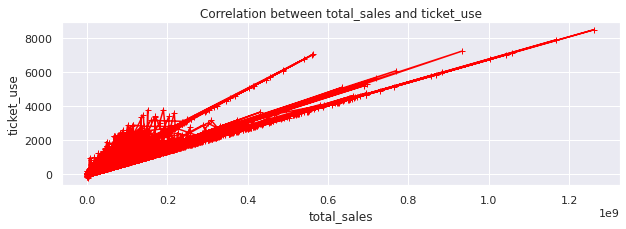

In [123]:
# Checking for correlation between 'total_sales' and 'ticket_use'
%matplotlib inline
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10,3))
plt.xlabel('total_sales')
plt.ylabel('ticket_use')
title = 'Correlation between total_sales and ticket_use'
plt.title(title)
plt.plot(df4.total_sales,df4.ticket_use,color='red',marker='+')

As expected we get a strong positive correlation, though not perfect, we can see that the number of 'total_sales' will always be higher than the final ticket usage

In [142]:
# Checking for seasonality in the 'total_sales' variable
scm = df5.pivot_table('total_sales','cinema_code','Month',aggfunc=np.sum)
scm

Month               April        August  February          July         June  \
cinema_code                                                                    
32.0         1.346370e+09  1.278140e+09       NaN  1.925680e+09  277540000.0   
33.0         6.152000e+08  7.133600e+08       NaN  7.015000e+08  221300000.0   
34.0         2.078730e+09  3.373020e+09       NaN  3.631920e+09  728860000.0   
35.0         1.485250e+09  1.232050e+09       NaN  8.872500e+08  395800000.0   
39.0         5.880000e+08  1.649930e+09       NaN  2.148490e+09  322800000.0   
...                   ...           ...       ...           ...          ...   
558.0                 NaN  7.680000e+06       NaN           NaN          NaN   
560.0                 NaN  1.050000e+06       NaN           NaN          NaN   
561.0                 NaN  2.475000e+08       NaN           NaN          NaN   
562.0                 NaN           NaN       NaN           NaN          NaN   
565.0                 NaN           NaN       NaN           NaN          NaN   

Month               March           May     November       October  \
cinema_code                                                          
32.0         7.682000e+08  2.123520e+09   84540000.0  1.067480e+09   
33.0         2.010000e+08  4.989500e+08   56280000.0  6.412800e+08   
34.0         1.355820e+09  1.139800e+09  271620000.0  2.431860e+09   
35.0         9.785500e+08  8.323000e+08  168500000.0  1.473050e+09   
39.0         6.209500e+08  7.570000e+08  109920000.0  1.686840e+09   
...                   ...           ...          ...           ...   
558.0                 NaN           NaN   13480000.0  9.264000e+07   
560.0                 NaN           NaN    3150000.0  5.761000e+07   
561.0                 NaN           NaN   61730000.0  6.168360e+08   
562.0                 NaN           NaN   21180000.0  1.367400e+08   
565.0                 NaN           NaN    4960000.0  1.760000e+06   

Month          September  
cinema_code               
32.0         384480000.0  
33.0         298980000.0  
34.0         794820000.0  
35.0         383400000.0  
39.0         522780000.0  
...                  ...  
558.0         32400000.0  
560.0          6545000.0  
561.0        103290000.0  
562.0                NaN  
565.0                NaN  

[243 rows x 10 columns]

Creating a pivot table for having structured information in terms of monthly total sales for every cinema. 

In [147]:
# Rearraging it to have it ordered per month
scm_ordered = scm[['February','March','April','May','June','July','August','September','October','November']]
scm_ordered.fillna(0)

Month        February         March         April           May         June  \
cinema_code                                                                    
32.0              0.0  7.682000e+08  1.346370e+09  2.123520e+09  277540000.0   
33.0              0.0  2.010000e+08  6.152000e+08  4.989500e+08  221300000.0   
34.0              0.0  1.355820e+09  2.078730e+09  1.139800e+09  728860000.0   
35.0              0.0  9.785500e+08  1.485250e+09  8.323000e+08  395800000.0   
39.0              0.0  6.209500e+08  5.880000e+08  7.570000e+08  322800000.0   
...               ...           ...           ...           ...          ...   
558.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   
560.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   
561.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   
562.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   
565.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   

Month                July        August    September       October  \
cinema_code                                                          
32.0         1.925680e+09  1.278140e+09  384480000.0  1.067480e+09   
33.0         7.015000e+08  7.133600e+08  298980000.0  6.412800e+08   
34.0         3.631920e+09  3.373020e+09  794820000.0  2.431860e+09   
35.0         8.872500e+08  1.232050e+09  383400000.0  1.473050e+09   
39.0         2.148490e+09  1.649930e+09  522780000.0  1.686840e+09   
...                   ...           ...          ...           ...   
558.0        0.000000e+00  7.680000e+06   32400000.0  9.264000e+07   
560.0        0.000000e+00  1.050000e+06    6545000.0  5.761000e+07   
561.0        0.000000e+00  2.475000e+08  103290000.0  6.168360e+08   
562.0        0.000000e+00  0.000000e+00          0.0  1.367400e+08   
565.0        0.000000e+00  0.000000e+00          0.0  1.760000e+06   

Month           November  
cinema_code               
32.0          84540000.0  
33.0          56280000.0  
34.0         271620000.0  
35.0         168500000.0  
39.0         109920000.0  
...                  ...  
558.0         13480000.0  
560.0          3150000.0  
561.0         61730000.0  
562.0         21180000.0  
565.0          4960000.0  

[243 rows x 10 columns]

In [148]:
# Creating anual sales as a sumation of the revenue collected for each month
months = ['February','March','April','May','June','July','August','September','October','November']
scm_ordered['anual_sales']=scm_ordered[months].sum(axis=1)
scm_ordered.fillna(0)

Month        February         March         April           May         June  \
cinema_code                                                                    
32.0              0.0  7.682000e+08  1.346370e+09  2.123520e+09  277540000.0   
33.0              0.0  2.010000e+08  6.152000e+08  4.989500e+08  221300000.0   
34.0              0.0  1.355820e+09  2.078730e+09  1.139800e+09  728860000.0   
35.0              0.0  9.785500e+08  1.485250e+09  8.323000e+08  395800000.0   
39.0              0.0  6.209500e+08  5.880000e+08  7.570000e+08  322800000.0   
...               ...           ...           ...           ...          ...   
558.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   
560.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   
561.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   
562.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   
565.0             0.0  0.000000e+00  0.000000e+00  0.000000e+00          0.0   

Month                July        August    September       October  \
cinema_code                                                          
32.0         1.925680e+09  1.278140e+09  384480000.0  1.067480e+09   
33.0         7.015000e+08  7.133600e+08  298980000.0  6.412800e+08   
34.0         3.631920e+09  3.373020e+09  794820000.0  2.431860e+09   
35.0         8.872500e+08  1.232050e+09  383400000.0  1.473050e+09   
39.0         2.148490e+09  1.649930e+09  522780000.0  1.686840e+09   
...                   ...           ...          ...           ...   
558.0        0.000000e+00  7.680000e+06   32400000.0  9.264000e+07   
560.0        0.000000e+00  1.050000e+06    6545000.0  5.761000e+07   
561.0        0.000000e+00  2.475000e+08  103290000.0  6.168360e+08   
562.0        0.000000e+00  0.000000e+00          0.0  1.367400e+08   
565.0        0.000000e+00  0.000000e+00          0.0  1.760000e+06   

Month           November   anual_sales  
cinema_code                             
32.0          84540000.0  9.255950e+09  
33.0          56280000.0  3.947850e+09  
34.0         271620000.0  1.580645e+10  
35.0         168500000.0  7.836150e+09  
39.0         109920000.0  8.406710e+09  
...                  ...           ...  
558.0         13480000.0  1.462000e+08  
560.0          3150000.0  6.835500e+07  
561.0         61730000.0  1.029356e+09  
562.0         21180000.0  1.579200e+08  
565.0          4960000.0  6.720000e+06  

[243 rows x 11 columns]

In [149]:
# Getting the cinemas ordered by their anual_sales
scm_ordered.sort_values(by=['anual_sales'], ascending = False).fillna(0)

Month          February         March         April           May  \
cinema_code                                                         
448.0        32030000.0  1.440489e+10  1.931129e+10  1.913506e+10   
304.0               0.0  8.254500e+09  9.263620e+09  8.795180e+09   
524.0               0.0  3.744130e+09  3.862745e+09  4.984880e+09   
489.0               0.0  3.562560e+09  4.694190e+09  5.272630e+09   
163.0               0.0  4.970590e+09  6.170190e+09  4.493294e+09   
...                 ...           ...           ...           ...   
520.0               0.0  0.000000e+00  0.000000e+00  1.110000e+07   
458.0               0.0  0.000000e+00  0.000000e+00  7.260000e+06   
424.0               0.0  0.000000e+00  0.000000e+00  1.005000e+07   
565.0               0.0  0.000000e+00  0.000000e+00  0.000000e+00   
512.0               0.0  0.000000e+00  0.000000e+00  0.000000e+00   

Month                June          July        August     September  \
cinema_code                                                           
448.0        1.121273e+10  2.891027e+10  2.598540e+10  1.054577e+10   
304.0        5.604421e+09  1.370693e+10  1.205644e+10  4.693690e+09   
524.0        3.048830e+09  9.628370e+09  7.455360e+09  3.144020e+09   
489.0        2.877117e+09  8.734500e+09  7.214105e+09  2.804070e+09   
163.0        2.587770e+09  8.275030e+09  7.047510e+09  3.054130e+09   
...                   ...           ...           ...           ...   
520.0        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
458.0        3.510000e+06  0.000000e+00  0.000000e+00  3.000000e+05   
424.0        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
565.0        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
512.0        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

Month             October      November   anual_sales  
cinema_code                                            
448.0        2.524747e+10  2.775485e+09  1.575604e+11  
304.0        1.050563e+10  1.173900e+09  7.405431e+10  
524.0        8.429610e+09  8.800200e+08  4.517796e+10  
489.0        7.728820e+09  8.124650e+08  4.370046e+10  
163.0        6.651500e+09  2.963400e+08  4.354635e+10  
...                   ...           ...           ...  
520.0        0.000000e+00  0.000000e+00  1.110000e+07  
458.0        0.000000e+00  0.000000e+00  1.107000e+07  
424.0        0.000000e+00  0.000000e+00  1.005000e+07  
565.0        1.760000e+06  4.960000e+06  6.720000e+06  
512.0        2.430000e+06  4.200000e+05  2.850000e+06  

[243 rows x 11 columns]

In [180]:
# Top ranking of the 3 cinemas with higher annual sales
scm_o2 = scm_ordered.sort_values(by=['anual_sales'], ascending = False).fillna(0).head(3)
scm_o2

Month          February         March         April           May  \
cinema_code                                                         
448.0        32030000.0  1.440489e+10  1.931129e+10  1.913506e+10   
304.0               0.0  8.254500e+09  9.263620e+09  8.795180e+09   
524.0               0.0  3.744130e+09  3.862745e+09  4.984880e+09   

Month                June          July        August     September  \
cinema_code                                                           
448.0        1.121273e+10  2.891027e+10  2.598540e+10  1.054577e+10   
304.0        5.604421e+09  1.370693e+10  1.205644e+10  4.693690e+09   
524.0        3.048830e+09  9.628370e+09  7.455360e+09  3.144020e+09   

Month             October      November   anual_sales  
cinema_code                                            
448.0        2.524747e+10  2.775485e+09  1.575604e+11  
304.0        1.050563e+10  1.173900e+09  7.405431e+10  
524.0        8.429610e+09  8.800200e+08  4.517796e+10

Concluding for seasonality, we can see from this summary table that the most popular months for going to the cinema are july, august and october. 

In [153]:
# For forecasting by cinema_code we calculate the total_sales for each cinema_code
sales_cine = df.groupby(['cinema_code'])['total_sales'].sum().reset_index()
sales_cine.sort_values(by=['total_sales'], ascending = False)[:15]

cinema_code   total_sales
151        448.0  1.575628e+11
101        304.0  7.408587e+10
216        524.0  4.523879e+10
186        489.0  4.370649e+10
41         163.0  4.354635e+10
120        344.0  4.159399e+10
152        450.0  3.294288e+10
122        352.0  3.161272e+10
17          71.0  2.842707e+10
206        513.0  2.775823e+10
211        518.0  2.641037e+10
24          89.0  2.425643e+10
182        485.0  2.203791e+10
30         141.0  2.141069e+10
19          73.0  1.997167e+10

In [130]:
# Getting the most occupied cinemas
occu_cine= df5.groupby(['cinema_code'])['occu_perc'].mean().reset_index()
occu_cine.sort_values(by=['occu_perc'], ascending = False)[:15]

cinema_code  occu_perc
173        474.0  64.123046
130        390.0  58.046580
182        485.0  43.811276
3           35.0  42.811049
109        316.0  41.143692
216        524.0  39.646101
101        304.0  39.042628
158        456.0  38.658501
192        497.0  37.742857
144        430.0  35.895231
197        503.0  35.539526
206        513.0  35.461489
151        448.0  35.438869
68         210.0  33.869310
103        307.0  31.838616

We can observe that the results from these both classifications differ from each other since total_sales is an absolute result and the occupation of each cinema is a relative measure, calculated in terms of each cinema's capacity. 

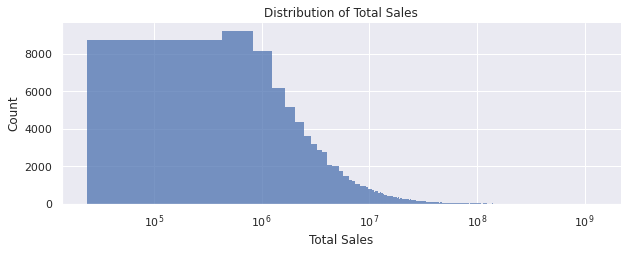

In [131]:
# Checking the distribution for 'total_sales' with outliers
total_sales =df5.total_sales.values
ax = sns.displot(total_sales)
fig = plt.gcf()
fig.set_size_inches(10,3)
plt.title("Distribution of Total Sales")
plt.xlabel('Total Sales')
plt.xscale('log')
plt.show()

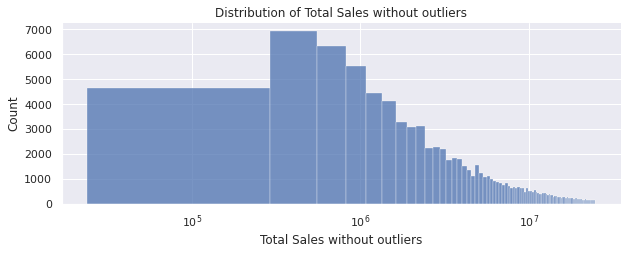

In [132]:
# Checking the distribution for 'total_sales' with outliers
df9 = df5.copy()
df9 = df9[~((total_sales < lower_ts) |(total_sales > upper_ts))]
total_sales_wo =df9.total_sales.values
ax = sns.displot(total_sales_wo)
fig = plt.gcf()
fig.set_size_inches(10,3)
plt.title("Distribution of Total Sales without outliers")
plt.xlabel('Total Sales without outliers')
plt.xscale('log')
plt.show()

We can see how much the distribution of the 'total_sales' varies once we eliminate the outliers that represented more of a 10% of the total observations. This has to be taken into account for forecasting, so what could be done is to analize these outliers separetely and see for which cinemas is needed this special treatment. 